In [60]:
import numpy as np
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes


# Question 8

In [6]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
design = MS(['horsepower']).fit(auto)
X = design.transform(auto) 
y = auto['mpg']


In [18]:
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [27]:
df_pred = pd.DataFrame({'horsepower': [98]})
X_pred = design.transform(df_pred)
y_pred = results.get_prediction(X_pred)
print(f'Confidence Interval: {y_pred.conf_int(alpha=0.05)}\nPrediction Interval: {y_pred.conf_int(obs=True, alpha=0.05)}')

Confidence Interval: [[23.97307896 24.96107534]]
Prediction Interval: [[14.80939607 34.12475823]]


In [31]:
results.params

intercept     39.935861
horsepower    -0.157845
dtype: float64

In [33]:
def plot_regr_line(ax: Axes, results, *args, **kwargs): 
    b = results.params[0]
    m = results.params[1]

    x_lim = ax.get_xlim()

    y = [x_lim[0] * m + b, x_lim[1] * m + b]

    ax.plot(x_lim, y, *args, **kwargs)

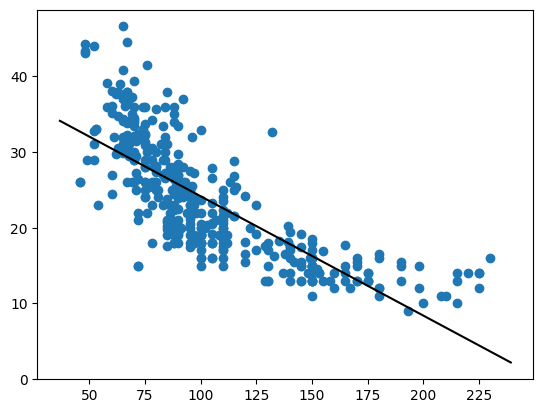

In [36]:
fig, ax = plt.subplots(1,1)

ax.scatter(X['horsepower'], y)
plot_regr_line(ax, results, color='black')

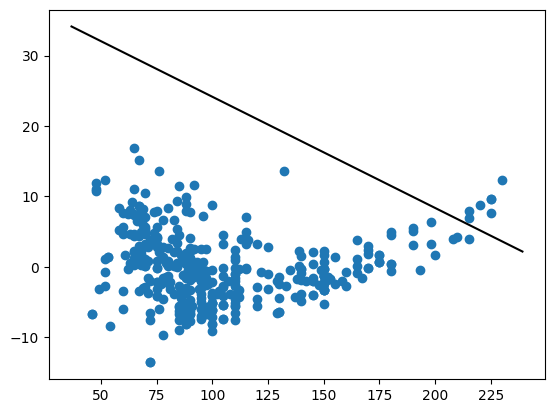

In [38]:
# plotting residuals
fig, ax = plt.subplots(1,1)

ax.scatter(X['horsepower'], results.resid)
plot_regr_line(ax, results, color='black')

In [47]:
vif = [VIF(X, i) for i in range(X.shape[1])]
vif = pd.DataFrame({'vif': vif}, index=X.columns)
vif

,vif
intercept,8.385254
horsepower,1.000000


# Question 9

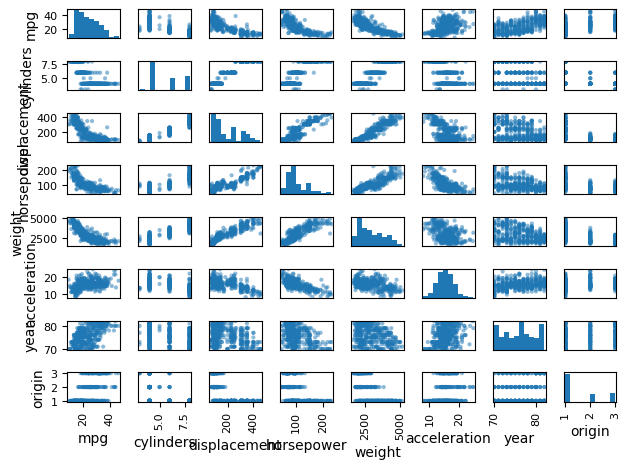

In [51]:
pd.plotting.scatter_matrix(auto)
plt.tight_layout()

In [52]:
auto.corr()

C:\Users\andre\AppData\Local\Temp\ipykernel_8576\668445388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [57]:
terms = auto.columns.drop(['mpg', 'name'])
design = MS(terms).fit(auto)
X = design.transform(auto)
y = auto['mpg']

In [59]:
model = sm.OLS(y, X)
results2 = model.fit() 

summarize(results2)
# accelerationm horsepower and cylinders are not statistically significant. 
# 1 year more adds 0.75 mpg 

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [63]:
anova_lm(results, results2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,9385.915872,0.0,NaN,NaN,NaN
1,384.0,4252.212530,6.0,5133.703341,77.267308,5.376746e-63


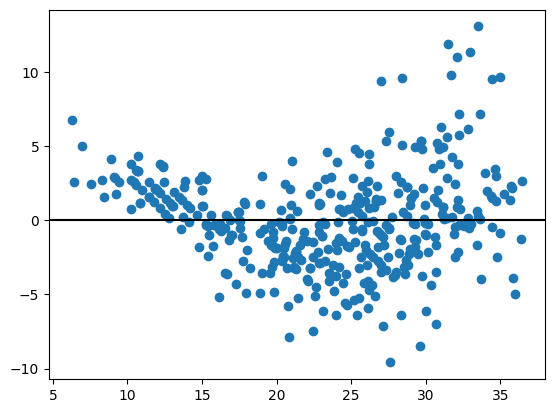

In [76]:
fig, ax = plt.subplots(1,1)

ax.scatter(results2.fittedvalues, results2.resid)
ax.axhline(0, c='k')

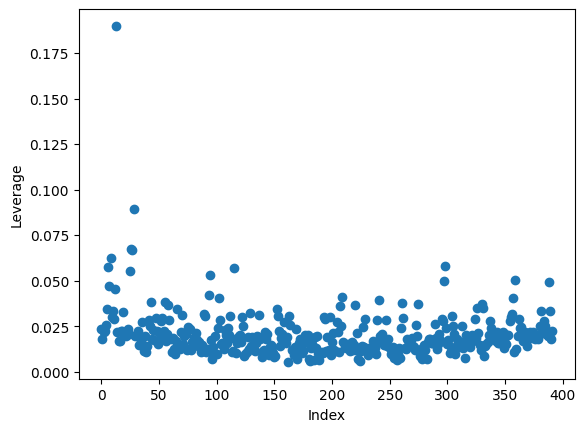

In [73]:
infl = results2.get_influence()
fig, ax = plt.subplots(1,1)

ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

lev_point = np.argmax(infl.hat_matrix_diag)

In [75]:
# plot the residuals / Standard Error to find outliers

13